# Case Studies Live 2024-11-13

## Q5a

In [41]:
import pandas as pd

In [42]:
X2 = pd.read_csv("Data02.csv")

In [43]:
X2.head()

,f1,f2,error
0,-1.111653,4.114752,1.604930
1,-1.290985,3.834506,0.895856
2,1.131218,4.681950,10.177544
3,-0.870644,3.510114,0.781415
4,3.521846,1.750216,26.853325


In [44]:
import matplotlib.pyplot as plt

(array([6.624e+03, 2.175e+03, 6.950e+02, 2.540e+02, 9.600e+01, 4.900e+01,
        3.100e+01, 1.700e+01, 1.400e+01, 1.100e+01, 1.200e+01, 5.000e+00,
        5.000e+00, 6.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 2.000e+00]),
 array([1.58052476e-04, 2.20684409e+00, 4.41353013e+00, 6.62021616e+00,
        8.82690220e+00, 1.10335882e+01, 1.32402743e+01, 1.54469603e+01,
        1.76536463e+01, 1.98603324e+01, 2.20670184e+01, 2.42737045e+01,
        2.64803905e+01, 2.86870765e+01, 3.08937626e+01, 3.31004486e+01,
        3.53071346e+01, 3.75138207e+01, 3.97205067e+01, 4.19271927e+01,
        4.41338788e+01]),
 <BarContainer object of 20 artists>)

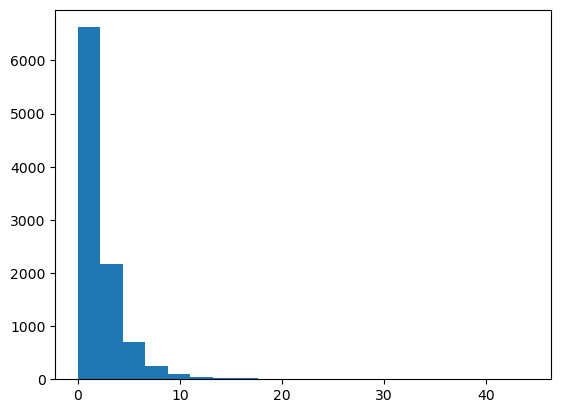

In [45]:
plt.hist(X2.error,bins=20)

In [46]:
9500/10000

0.95

## Q5b

In [47]:
# desperate student's way :-) 

good = 0
bad = 0
cnt = 0

for i in range(0,10000):
    if  X2.error[i] < 6:
        good = good +1
    else:
        bad = bad + 1
    cnt = cnt + 1


In [48]:
print(good, bad, cnt)

9360 640 10000


In [49]:
9360+640

10000

In [36]:
X2.shape

(10000, 3)

In [50]:
# pandas way

(X2.error < 6).value_counts()

error
True     9360
False     640
Name: count, dtype: int64


9360 parts have error y 6 ==> good
rest, i.e. 640 ==> bad

## Q5c

Smart Student's way :-)

the most stupid predictor would predict the most frequent class. Here this is good. So we would predict 10000 good parts. 9360 of those predictions would be correct. 

the accuracy metrics is calculated by dividing number of correct predictions by number of all predictions.

here we get 9360 / 1000 ~ 93.6 %

In [51]:
# now safe way 

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
y_true = X2.error < 6 

In [59]:
y_stupid = pd.Series([True] * 10000)

In [61]:
y_stupid = X2.error > -1

In [64]:
print(accuracy_score(y_true,y_stupid))

0.936


The baseline is 93.6 %

## Q5d

The dataset is unbalanced because we have 936 good and only 640 bad instances in the dataset.

To train and evaluate we do a train-test-split. One parameter is the fraction we use for training and the other fraction we use for testing.
==> the choice of this parameter is not depending on the balancedness 

in an unbalanced dataset we might accidentially split in a way that has onle ony class in the training or the test data. This is not good but we can not really cure it. Therefore, let's make sure that our train and our test data contains the same ratio of classes as the original data (is equally unbalanced)
==> stratified split

K-Fold validation might be a good idea.



# Q6